In [ ]:
# Importing necessary libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading Dataset

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/compute_datasets/breast_cancer_survival.csv")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [ ]:
# Checking for Null values

df.isna().sum()

,0
Age,0
Gender,0
Protein1,0
Protein2,0
Protein3,0
Protein4,0
Tumour_Stage,0
Histology,0
ER status,0
PR status,0


In [ ]:
# There are only a few null values.
# So, dropping the rows containing null values.
# First Droping 'Date of last visit' and 'Date of surgery'as it doesn't seem's insightfull as of now.

df.drop(['Date_of_Last_Visit', 'Date_of_Surgery'], axis=1, inplace=True)
df.dropna(inplace=True)
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,Alive


In [ ]:
df.shape

(321, 13)

In [ ]:
print(df['ER status'].unique())
print(df['PR status'].unique())
print(df['HER2 status'].unique())

['Positive']
['Positive']
['Negative' 'Positive']


In [ ]:
# Droping col's 'ER status', 'PR status' as they only contain a single entry 'Positive',
# which ultimately tells these col's don't have any predictive power.

df.drop(['ER status', 'PR status'], axis=1, inplace=True)
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Negative,Other,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Negative,Lumpectomy,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Negative,Other,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Lumpectomy,Alive


In [ ]:
print(df['Gender'].unique())
print(df['Gender'].value_counts())

['FEMALE' 'MALE']
Gender
FEMALE    317
MALE        4
Name: count, dtype: int64


In [ ]:
# There are only 4 entries for male gender which may behave as outlier, in our
# model later and create imbalance.
# Therefore droping rows with male gender and also gender col

df.drop(df[df['Gender'] == 'MALE'].index, inplace=True)
df.drop('Gender', axis=1, inplace=True)
df.head()

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status
0,42,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Negative,Other,Alive
1,54,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead
2,63,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Negative,Lumpectomy,Alive
3,78,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Negative,Other,Alive
4,42,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Lumpectomy,Alive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 333
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             317 non-null    int64  
 1   Protein1        317 non-null    float64
 2   Protein2        317 non-null    float64
 3   Protein3        317 non-null    float64
 4   Protein4        317 non-null    float64
 5   Tumour_Stage    317 non-null    object 
 6   Histology       317 non-null    object 
 7   HER2 status     317 non-null    object 
 8   Surgery_type    317 non-null    object 
 9   Patient_Status  317 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 27.2+ KB


In [ ]:
# Coverting Tumour_stage to int type

df['Tumour_Stage'].replace({'I': 1, 'II': 2, 'III': 3}, inplace=True)
df.head()

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status
0,42,0.95256,2.15000,0.007972,-0.048340,2,Infiltrating Ductal Carcinoma,Negative,Other,Alive
1,54,0.00000,1.38020,-0.498030,-0.507320,2,Infiltrating Ductal Carcinoma,Negative,Other,Dead
2,63,-0.52303,1.76400,-0.370190,0.010815,2,Infiltrating Ductal Carcinoma,Negative,Lumpectomy,Alive
3,78,-0.87618,0.12943,-0.370380,0.132190,1,Infiltrating Ductal Carcinoma,Negative,Other,Alive
4,42,0.22611,1.74910,-0.543970,-0.390210,2,Infiltrating Ductal Carcinoma,Positive,Lumpectomy,Alive


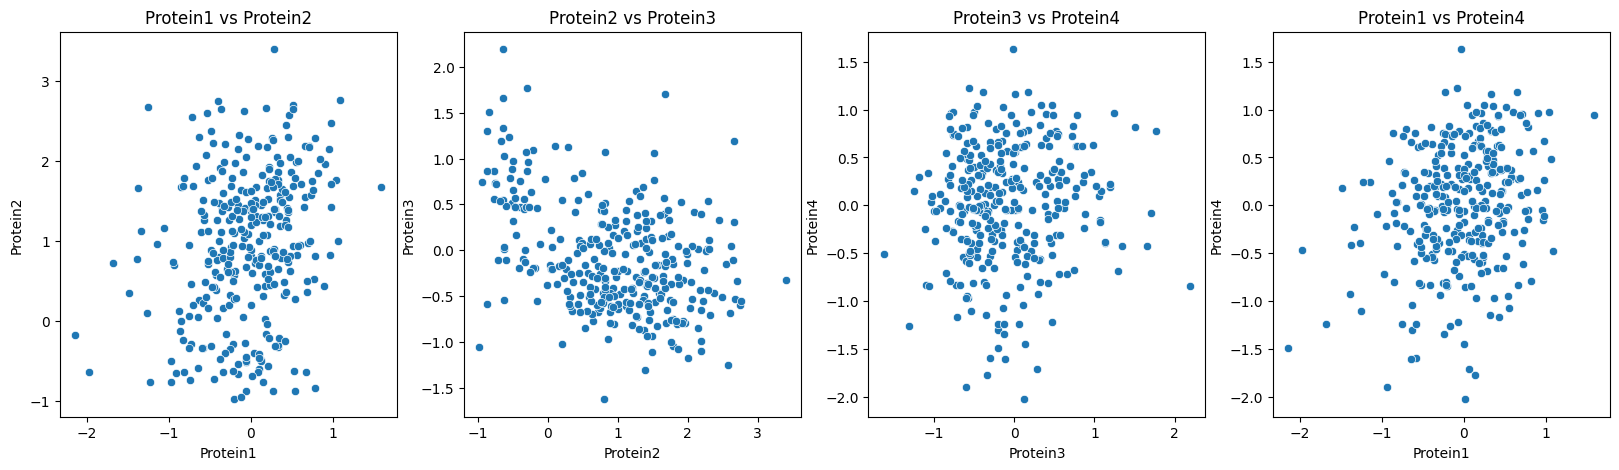

In [ ]:
# Plotting some scatterplots to check for any co-relation among different protein groups
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.scatterplot(x='Protein1', y='Protein2', data=df, ax=axes[0])
axes[0].set_title("Protein1 vs Protein2")

sns.scatterplot(x='Protein2', y='Protein3', data=df, ax=axes[1])
axes[1].set_title("Protein2 vs Protein3")

sns.scatterplot(x='Protein3', y='Protein4', data=df, ax=axes[2])
axes[2].set_title("Protein3 vs Protein4")

sns.scatterplot(x='Protein1', y='Protein4', data=df, ax=axes[3])
axes[3].set_title("Protein1 vs Protein4")

plt.show()

# There doesn't seem any co-relation between different proteins,
# May be we have less data or there is actually no co-relation

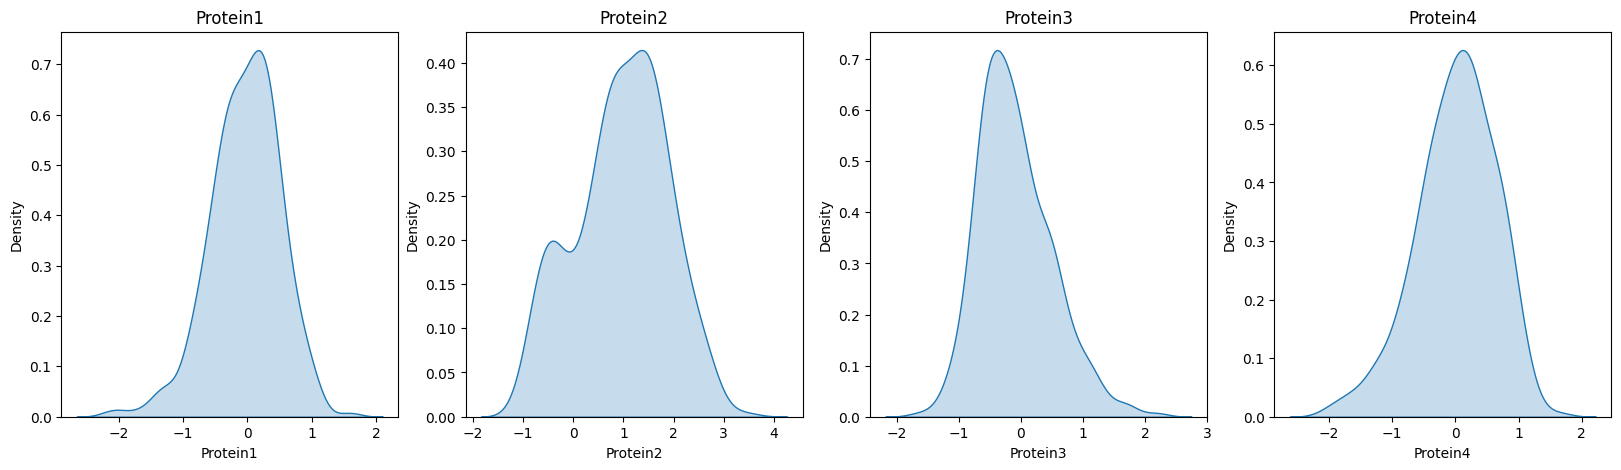

In [ ]:
# Plotting KDE to check for variations within proteins
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.kdeplot(x='Protein1', data=df, ax=axes[0], fill=True)
axes[0].set_title("Protein1")

sns.kdeplot(x='Protein2', data=df, ax=axes[1], fill=True)
axes[1].set_title("Protein2")

sns.kdeplot(x='Protein3', data=df, ax=axes[2], fill=True)
axes[2].set_title("Protein3")

sns.kdeplot(x='Protein4', data=df, ax=axes[3], fill=True)
axes[3].set_title("Protein4")

plt.show()
# This variation is also almost similiar to all proteins, kind of disrupted gaussian.

In [ ]:
# The numerical data alone didn't took us too far, one-hot encoding are categorial data.
# For the nominal ones.

col_to_encode = ['Histology', 'Surgery_type']
# drop_first=True is just used for reducing number of cols.
df = pd.get_dummies(df, columns=col_to_encode, dtype='int8', drop_first=True)
df.head()

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,HER2 status,Patient_Status,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy
0,42,0.95256,2.15000,0.007972,-0.048340,2,Negative,Alive,0,0,0,1,0
1,54,0.00000,1.38020,-0.498030,-0.507320,2,Negative,Dead,0,0,0,1,0
2,63,-0.52303,1.76400,-0.370190,0.010815,2,Negative,Alive,0,0,0,0,0
3,78,-0.87618,0.12943,-0.370380,0.132190,1,Negative,Alive,0,0,0,1,0
4,42,0.22611,1.74910,-0.543970,-0.390210,2,Positive,Alive,0,0,0,0,0


In [ ]:
# Replacing Her2 status and Patient status
# they are ordinal

df['HER2 status'].replace({'Positive': 1, 'Negative': 0}, inplace=True)
df['Patient_Status'].replace({'Alive': 1, 'Dead': 0}, inplace=True)
df.head()

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,HER2 status,Patient_Status,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy
0,42,0.95256,2.15000,0.007972,-0.048340,2,0,1,0,0,0,1,0
1,54,0.00000,1.38020,-0.498030,-0.507320,2,0,0,0,0,0,1,0
2,63,-0.52303,1.76400,-0.370190,0.010815,2,0,1,0,0,0,0,0
3,78,-0.87618,0.12943,-0.370380,0.132190,1,0,1,0,0,0,1,0
4,42,0.22611,1.74910,-0.543970,-0.390210,2,1,1,0,0,0,0,0


In [ ]:
# Checking again if now any co-relation exits

df.corr().style.background_gradient(cmap='coolwarm')

# Still there doesn't seem any meaningfull or strong co-relation in the data to build a ML model on it.

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,HER2 status,Patient_Status,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy
Age,1.000000,-0.046790,-0.016992,-0.046644,0.100686,-0.165224,-0.070856,-0.021528,-0.097211,-0.036053,-0.107380,0.042876,-0.015696
Protein1,-0.046790,1.000000,0.244917,-0.114907,0.265065,-0.053996,-0.028552,0.018720,0.004214,0.077402,-0.023241,-0.140599,0.004955
Protein2,-0.016992,0.244917,1.000000,-0.409901,0.084210,-0.048832,-0.015208,-0.082480,0.069061,-0.058886,-0.111561,0.050602,-0.033694
Protein3,-0.046644,-0.114907,-0.409901,1.000000,0.078748,0.023430,-0.019170,-0.032293,-0.067891,0.059204,0.119305,-0.058831,-0.050955
Protein4,0.100686,0.265065,0.084210,0.078748,1.000000,-0.053267,0.003148,-0.084024,-0.022480,0.047318,0.027870,-0.054326,-0.068641
Tumour_Stage,-0.165224,-0.053996,-0.048832,0.023430,-0.053267,1.000000,0.141983,-0.056051,0.075989,-0.090596,0.270735,-0.009322,-0.086371
HER2 status,-0.070856,-0.028552,-0.015208,-0.019170,0.003148,0.141983,1.000000,0.052751,-0.010288,-0.005607,-0.005665,-0.068238,-0.023304
Patient_Status,-0.021528,0.018720,-0.082480,-0.032293,-0.084024,-0.056051,0.052751,1.000000,0.028821,-0.022085,-0.026786,-0.069693,0.021860
Histology_Infiltrating Lobular Carcinoma,-0.097211,0.004214,0.069061,-0.067891,-0.022480,0.075989,-0.010288,0.028821,1.000000,-0.116206,0.032132,0.081842,-0.060421
Histology_Mucinous Carcinoma,-0.036053,0.077402,-0.058886,0.059204,0.047318,-0.090596,-0.005607,-0.022085,-0.116206,1.000000,0.058401,-0.131709,-0.017407


In [ ]:
df.describe()
# Most of the patients are above 49 years old.
# So, may be increase in age can increase the chances breast_cancer

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,HER2 status,Patient_Status,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000
mean,58.839117,-0.036148,0.954586,-0.092132,0.009829,2.050473,0.091483,0.794953,0.255521,0.037855,0.283912,0.305994,0.201893
std,12.889599,0.539693,0.913551,0.590916,0.625618,0.658903,0.288750,0.404375,0.436843,0.191147,0.451607,0.461556,0.402047
min,29.000000,-2.144600,-0.978730,-1.627400,-2.025500,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,-0.361770,0.359950,-0.531360,-0.382240,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,0.003977,1.000300,-0.177200,0.040511,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68.000000,0.331860,1.633200,0.281490,0.436250,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,90.000000,1.593600,3.402200,2.193400,1.629900,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df['Patient_Status'].value_counts()

# Outof 317 filtered entries, 65 patients died giving a mortality rate of approx. 20%

,count
Patient_Status,
1,252
0,65


In [ ]:
# Most of things done above manually can be done using ydata-profiling
# That summarizes the report and renders a HTML page.
!pip install ydata-profiling -q
import ydata_profiling as yd

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 55.5 MB/s eta 0:00:00


In [ ]:
# Reloading the original dataset
df_yd = pd.read_csv("/content/drive/My Drive/compute_datasets/breast_cancer_survival.csv")
df_yd.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [ ]:
profile = yd.ProfileReport(df_yd, title='Breast Cancer Profile report')
profile
# profile.to_file(output_file='breast_cancer_survival.html') <-- Can be used to store HTML file

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Inferences of the above report are almost identical to the one we did manually :)